In [32]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [33]:
full=cv2.imread('sammy.jpg')
ful=cv2.cvtColor(full,cv2.COLOR_BGR2RGB)

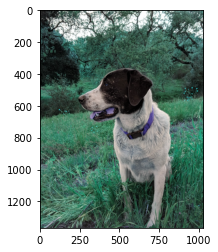

In [34]:
plt.imshow(full)

In [35]:
full.shape

(1367, 1025, 3)

Template images 

A subset of the image,Note how its actually the exact image. LAter on we will discuss more advanced methods for general matching. such as facial recognition

In [36]:
face=cv2.imread('sammy_face.jpg')
face=cv2.cvtColor(face,cv2.COLOR_BGR2RGB)

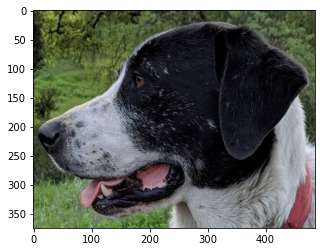

In [37]:
plt.imshow(face)

In [38]:
sum([1,2,3])


6

In [39]:
mystring='sum'

In [40]:
mystring([1,2,3])

TypeError: 'str' object is not callable

In [41]:
eval(mystring)

<function sum(iterable, /, start=0)>

In [42]:
myfunc=eval(mystring)

In [43]:
myfunc([1,2,3])

6

In [44]:
#the full image to search 
full=cv2.imread('sammy.jpg')
full=cv2.cvtColor(full,cv2.COLOR_BGR2RGB)

#the template to match
face=cv2.imread('sammy_face.jpg')
face=cv2.cvtColor(face, cv2.COLOR_BGR2RGB)

#all the 6 methods for comparison in a list 
#note how we are using strings, later on we will use the eval()
#function to convert to function
methods = ['cv2.TM_CCOEFF','cv2.TM_CCOEFF_NORMED','cv2.TM_CCORR','cv2.CCORR_NORMED','cv2.TM_SQDTFF','cv2.TM_SQDIF_NORMED']

AttributeError: module 'matplotlib.pyplot' has no attribute 'subtitle'

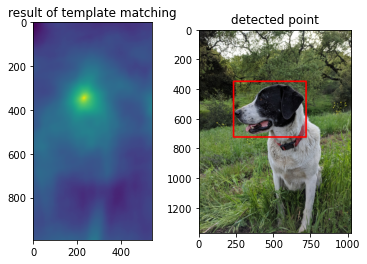

In [45]:
for m in methods:
    #create a copy of the image
    full_copy=full.copy()
    
    #get the actual function instead of the string
    method=eval(m)
    
    #apply template matching with the method
    res=cv2.matchTemplate(full_copy,face,method)
    
    #grab the max and min values, plus their locations
    min_val, max_val, min_loc, max_loc = cv2.minMaxLoc(res)
    
    #set up drawing of rectangle
    
    #if the method is TM_SQOTFF or TM_SQOTFF_NORMED, take minimum
    #notice the coloring on the last 2 left hand side images.
    if method in [cv2.TM_SQDIFF,cv2.TM_SQDIFF_NORMED]:
        top_left=min_loc
    else:
        top_left=max_loc

    #assign the bottom right of the rectangle
    bottom_right=(top_left[0]+width,top_left[1]+height)
    
    #draw the red rectangle
    cv2.rectangle(full_copy,top_left,bottom_right,255,10)
    
    #plot the images 
    plt.subplot(121)
    plt.imshow(res)
    plt.title('result of template matching')
    
    plt.subplot(122)
    plt.imshow(full_copy)
    plt.title("detected point")
    plt.subtitle(m)
    
    plt.show()
    print('\n')
    print('\n')